In [11]:
import pandas as pd
import numpy as np
import csv
import glob
import os

In [12]:
samsung_stoke_data_base = r'D:\dataset\stoke\samsung\data'
samsung_stoke_label_base = r'D:\dataset\stoke\samsung\label'
oil_data_base = r'D:\dataset\stoke\oil\data'
oil_label_base = r'D:\dataset\stoke\oil\label'
ex_bio_data_base = r'D:\dataset\stoke\ex_bio\data'
ex_bio_label_base = r'D:\dataset\stoke\ex_bio\label'
usecols = ['time', 'price', 'sell', 'buy', 'trading_volum']

---

## 여러 주식 data 요소들을 하나의 numpy배열로 묶기

In [13]:
data = pd.read_csv( r'D:\dataset\stoke\new_total\data'+ '\\samsung.csv')

In [15]:
print(len(data['open'].values))

2856


In [5]:
class Data_join:
    path = ''
    sequence_length = 0
    data = np.array([])
    label = np.array([])
    
    #초기값 설정
    def __init__(self, value1, value2):
        self.sequence_length = value1
        self.path = value2

    
    #데이터 판다스로 받고, 정규화함
    def datagen(self):
        data = pd.read_csv(base_data + self.path + '.csv')
        open1 = data['open'].values
        open1 = open1.astype('float32')
        volumn = data['volume'].values.astype('float32')
        high = data['high'].values.astype('float32')
        low = data['low'].values.astype('float32')
        close = data['close'].values.astype('float32') 
        data['open'].plot()
        data['close'].plot()
        
        #데이터 정규화
        #open
        mean_open = open1.mean(axis =0)
        open1 -= mean_open
        std_open = open1.std(axis = 0)
        open1 /= std_open
        #volumn
        mean_volumn = volumn.mean(axis = 0)
        volumn -= mean_volumn
        std_volumn = volumn.std(axis = 0)
        volumn /= std_volumn
        #high
        mean_high = high.mean(axis = 0)
        high -= mean_high
        std_high = high.std(axis = 0)
        high /= std_high
        #close
        mean_close = close.mean(axis = 0)
        close -= mean_close
        std_close = close.std(axis = 0)
        close /= std_close
        #low
        mean_low = low.mean(axis = 0)
        low -= mean_low
        std_low = low.std(axis = 0)
        low /= std_low
        
        #두 데이터 합치기
        open1 = open1[:, np.newaxis]
        volumn = volumn[:, np.newaxis]
        high = high[:, np.newaxis]
        close = close[:, np.newaxis]
        low = low[:, np.newaxis]
        real_data = np.concatenate((open1, close, high, low, volumn), axis = 1)
        
        #window 만들기  
        result = []
        for index in range(len(real_data) - self.sequence_length):
            result.append(real_data[index: index + self.sequence_length])
        
        new_data = np.array(result)
        #new_data = new_data[:, :, :, np.newaxis]
        self.data = new_data
        del result

    def labelgen(self):
        label = np.load(base_label + self.path+'.npy')
        label = label[self.sequence_length - 1:]
        self.label = label

# base가 되는 폴더 설정

In [6]:
base_data = r'D:\dataset\stoke\new_total\data'
base_label = r'D:\dataset\stoke\new_total\label'

# data 합치기

   - 여러개 필요할 때

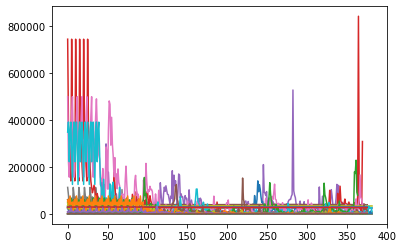

In [24]:
test1 = Data_join(5, '\\20201005')
test1.datagen()
test1.labelgen()

test2 = Data_join(5, '\\20201006')
test2.datagen()
test2.labelgen()

test3 = Data_join(5, '\\20201007')
test3.datagen()
test3.labelgen()

test4 = Data_join(5, '\\20201008')
test4.datagen()
test4.labelgen()

test5 = Data_join(5, '\\20201012')
test5.datagen()
test5.labelgen()

test6 = Data_join(5, '\\20201013')
test6.datagen()
test6.labelgen()

test7 = Data_join(5, '\\20201014')
test7.datagen()
test7.labelgen()

test8 = Data_join(5, '\\20201020')
test8.datagen()
test8.labelgen()

test9 = Data_join(5, '\\20201021')
test9.datagen()
test9.labelgen()

test10 = Data_join(5, '\\20201022')
test10.datagen()
test10.labelgen()

test11 = Data_join(5, '\\20201023')
test11.datagen()
test11.labelgen()

test12 = Data_join(5, '\\20201026')
test12.datagen()
test12.labelgen()

In [25]:
total_data = np.concatenate((test1.data, test2.data, test3.data, test4.data,
                            test5.data, test6.data, test7.data, test8.data,
                            test9.data, test10.data, test11.data, test12.data), axis=0)

In [26]:
total_label = np.concatenate((test1.label, test2.label, test3.label, test4.label,
                            test5.label, test6.label, test7.label, test8.label,
                            test9.label, test10.label, test11.label, test12.label), axis=0)

- ### 하나로 만들 수 있을 때

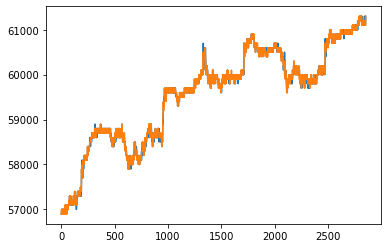

In [7]:
test12 = Data_join(5, '\\samsung')
test12.datagen()
test12.labelgen()

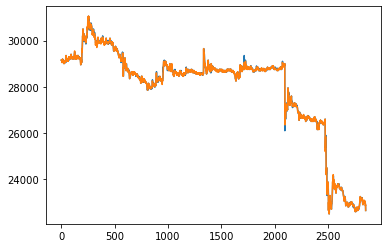

In [8]:
test3 = Data_join(5, '\\ex_bio')
test3.datagen()
test3.labelgen()

In [16]:
total_data = np.concatenate((test12.data, test3.data), axis=0)

In [17]:
total_label = np.concatenate((test12.label, test3.label), axis=0)

In [10]:
print(test3.data.shape)
print(test3.label.shape)

(2851, 5, 5)
(2851,)


In [20]:
np.save(r'D:\dataset\stoke\total_data\samsung_data', test12.data)
np.save(r'D:\dataset\stoke\total_data\samsung_label', test12.label)

np.save(r'D:\dataset\stoke\total_data\exbio_data', test3.data)
np.save(r'D:\dataset\stoke\total_data\exbio_label', test3.label)

np.save(r'D:\dataset\stoke\total_data\total_data', total_data)
np.save(r'D:\dataset\stoke\total_data\total_label', total_label)

# total_data에 덧붙이기

In [5]:
pre_total_data = np.load(r'D:\dataset\stoke\total_data\total_data.npy')
pre_total_label = np.load(r'D:\dataset\stoke\total_data\total_label.npy')

In [ ]:
after_total_data = np.concatenate((   ), axis = 0)
after_total_label = np.concatenate((   ), axis = 0)

np.save(r'D:\dataset\stoke\total_data\after_total_data', after_total_data)
np.save(r'D:\dataset\stoke\total_data\after_total_label', after_total_label)

---

In [15]:
'''class Data_join:
    path = ''
    sequence_length = 0
    data = np.array([])
    label = np.array([])
    
    #초기값 설정
    def __init__(self, value1, value2):
        self.sequence_length = value1
        self.path = value2

    
    #데이터 판다스로 받고, 정규화함
    def datagen(self):
        data = pd.read_csv(base_data + self.path + '.csv')
        open1 = data['open'].values
        open1 = open1.astype('float32')
        volumn = data['volume'].values.astype('float32')
        high = data['high'].values.astype('float32')
        low = data['low'].values.astype('float32')
        close = data['close'].values.astype('float32') 
        data['open'].plot()
        data['close'].plot()
        
        #데이터 정규화
        #open
        mean_open = open1.mean(axis =0)
        open1 -= mean_open
        std_open = open1.std(axis = 0)
        open1 /= std_open
        #volumn
        mean_volumn = volumn.mean(axis = 0)
        volumn -= mean_volumn
        std_volumn = volumn.std(axis = 0)
        volumn /= std_volumn
        #high
        mean_high = high.mean(axis = 0)
        high -= mean_high
        std_high = high.std(axis = 0)
        high /= std_high
        #close
        mean_close = close.mean(axis = 0)
        close -= mean_close
        std_close = close.std(axis = 0)
        close /= std_close
        #low
        mean_low = low.mean(axis = 0)
        low -= mean_low
        std_low = low.std(axis = 0)
        low /= std_low
        
        #두 데이터 합치기
        open1 = open1[:, np.newaxis]
        volumn = volumn[:, np.newaxis]
        high = high[:, np.newaxis]
        close = close[:, np.newaxis]
        low = low[:, np.newaxis]
        real_data = np.concatenate((open1, close, high, low, volumn), axis = 1)
        
        #window 만들기  
        result = []
        for index in range(len(real_data) - self.sequence_length):
            result.append(real_data[index: index + self.sequence_length])
        
        new_data = np.array(result)
        #new_data = new_data[:, :, :, np.newaxis]
        self.data = new_data
        del result

    def labelgen(self):
        label = np.load(base_label + self.path+'.npy')
        label = label[self.sequence_length - 1:]
        self.label = label'''

"\nclass Data_join:\n    path = ''\n    sequence_length = 0\n    data = np.array([])\n    label = np.array([])\n    \n    #초기값 설정\n    def __init__(self, value1, value2):\n        self.sequence_length = value1\n        self.path = value2\n\n    \n    #데이터 판다스로 받고, 정규화함\n    def datagen(self):\n        data = pd.read_csv(base_data + self.path + '.csv')\n        prices = data['price'].values\n        volumn = data['trading_validation'].values\n        diffrence = data['trash'].values\n        data['price'].plot()\n        data['trading_validation'].plot()\n        data['trash'].plot()\n        \n        #데이터 정규화\n        #price\n        mean_prices = prices.mean(axis =0)\n        prices -= mean_prices\n        std_prices = prices.std(axis = 0)\n        prices /= std_prices\n        #volumn\n        mean_volumn = volumn.mean(axis = 0)\n        volumn -= mean_volumn\n        std_volumn = volumn.std(axis = 0)\n        volumn /= std_volumn\n        #diffrence\n        mean_diffrence = diffre